In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#matplotlib.rcParams.update({'font.size': 20})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (3,2)})
import pandas as pd
import seaborn as sns
from copy import deepcopy

import sys
import os
import subprocess
import glob
from collections import defaultdict
import scipy as sp
from scipy import special

In [2]:
directory = "/media/ian/Data/md_lv_sims/"

In [3]:
%cd $directory

/media/ian/Data/md_lv_sims


In [4]:
pwd

'/media/ian/Data/md_lv_sims'

In [5]:
def fetch_xyz(file, dim=2, stride=1):
    assert(dim==2 or dim==3)
    output = []
    idx = 0
    with open(file, "r") as xyz:
        try:
            while True:
                N = int(xyz.readline())
                xyz.readline()
                arr = np.empty((N, dim))
                for i in np.arange(N):
                    line = xyz.readline()
                    _, x, y, _ = line.split()
                    if dim == 2:
                        arr[i] = np.array([float(x), float(y)])
                    else:
                        arr[i] = np.array([float(x), float(y), float(z)])
                if idx % stride == 0:
                    output.append(arr)
        except:
            pass
    return np.array(output)

def msd_wrap_drift(traj, L, ref=0):
    L2 = L/2
    shape = traj.shape
    timesteps = shape[0]
    N = shape[1]
    oN = 1/N
    dim = shape[2]

    wrap = np.zeros((N, dim))

    msd = np.zeros((timesteps-ref))
    
    for i in np.arange(ref+1, timesteps):
        diff = traj[i] - traj[i-1]
        cond1 = diff > L2
        cond2 = diff < -L2
        wrap += cond2.astype(int) - cond1.astype(int)

        move = traj[i] + L*wrap - traj[ref]

        drift = np.mean(move, axis=0)

        msd[i-ref] = np.mean(np.square(np.linalg.norm(move-drift, axis=-1)))
    return msd, wrap

In [6]:
trajs = sorted(glob.glob("replica_test1/traj_*"))[:100000]
logs = sorted(glob.glob("replica_test1/log_*"))[:100000]
val_trajs = sorted(glob.glob("validation_test1/traj_*"))[:100000]
val_logs = sorted(glob.glob("validation_test1/log_*"))[:100000]

In [7]:
len(trajs), len(logs)

(100000, 100000)

In [8]:
trajs[0], logs[0]

('replica_test1/traj_init_compress_replica_n10_l3_t0.0001_si1.5_fsi1_es1_step2000_dt0.001_visc5_seed0_out100.xyz',
 'replica_test1/log_Ib_init_compress_replica_n10_l3_t0.0001_si1.5_fsi1_es1_step2000_dt0.001_visc5_seed0_out100.dat')

In [9]:
len(logs)

100000

In [10]:
data = []
for l in logs:
    tmp = np.loadtxt(l)
    data.append(tmp)
data = np.array(data)[:,:]

In [11]:
data.shape

(100000, 20)

In [158]:
idx = np.argwhere(np.all(data[:,...] == 0, axis=-1))

In [170]:
new_data = np.delete(data, idx, axis=0)

In [198]:
val_data = []
for l in val_logs:
    tmp = np.loadtxt(l)
    if tmp.shape != 
    val_data.append(tmp)
val_data = np.array(val_data)[:,:]

<ipython-input-198-3a5c4ad83bde>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val_data = np.array(val_data)[:,:]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [202]:
val_data[0].shape

(21,)

Text(0.5, 0, '$t$')

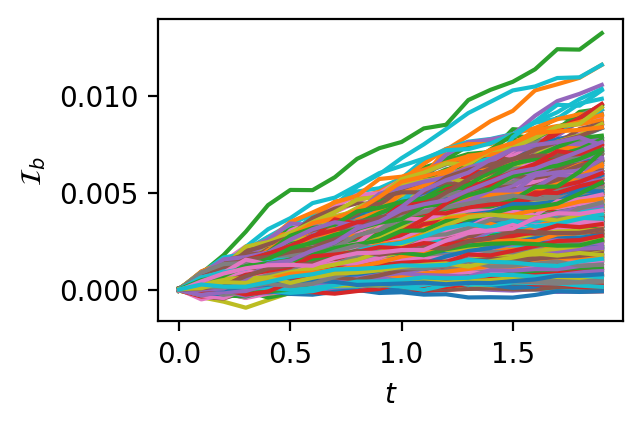

In [13]:
x = np.linspace(0, 1.9, 20)
for i in range(0, len(data), 100):
    plt.plot(x, data[i])
plt.ylabel(r"$\mathcal{I}_b$")
plt.xlabel(r"$t$")

In [14]:
msd_data_drift = []
for j in np.arange(len(trajs)):
    i = j
    if i%10000 == 0:
        print(len(trajs), i)
    f = trajs[i]
    xyz = fetch_xyz(f)
    msd_t, _ = msd_wrap_drift(xyz, 3, ref=0)
    msd_data_drift.append(msd_t)
msd_data_drift = np.array(msd_data_drift)

100000 0
100000 10000
100000 20000
100000 30000
100000 40000
100000 50000
100000 60000
100000 70000
100000 80000
100000 90000


In [172]:
new_msd = np.delete(msd_data_drift, idx, axis=0)

In [15]:
val_msd_data_drift = []
for j in np.arange(len(val_trajs)):
    i = j
    if i%10000 == 0:
        print(len(val_trajs), i)
    f = val_trajs[i]
    xyz = fetch_xyz(f)
    msd_t, _ = msd_wrap_drift(xyz, 3, ref=0)
    val_msd_data_drift.append(msd_t)
val_msd_data_drift = np.array(val_msd_data_drift)

100000 0
100000 10000
100000 20000
100000 30000
100000 40000
100000 50000
100000 60000
100000 70000
100000 80000
100000 90000


Text(0.5, 1.0, '$t=2.0$')

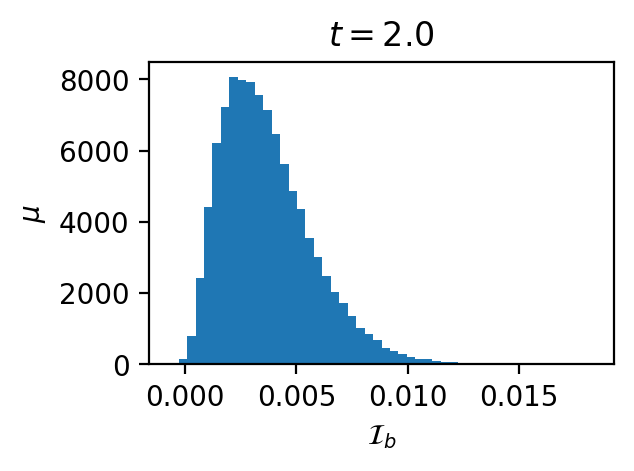

In [21]:
plt.hist(data[:,-1], bins=50)
plt.xlabel(r"$\mathcal{I}_b$")
plt.ylabel(r"$\mu$")
plt.title(r"$t=2.0$")

Text(0.5, 0, '$t$')

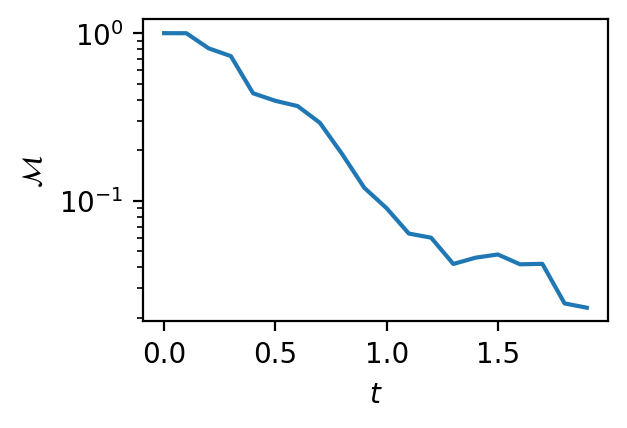

In [17]:
plt.plot(x, np.mean(np.exp(-data*1e4), axis=0))
plt.yscale('log')
plt.ylabel(r"$\mathcal{M}$")
plt.xlabel(r"$t$")

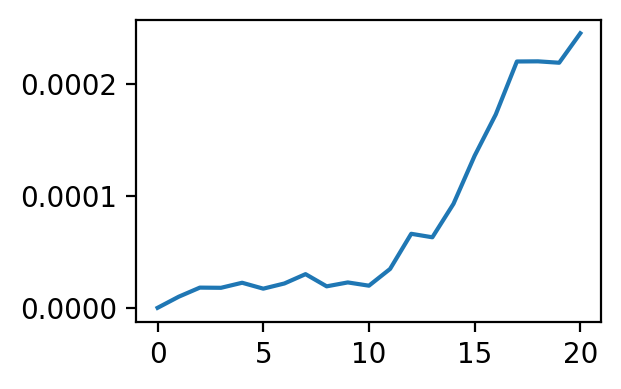

In [133]:
plt.plot(msd_data_drift[2])

In [18]:
def get_bias_quantity(factor, temperature, quantity):
    P = -factor/temperature
    norm = sp.special.logsumexp(P, axis=0)
    numerator = sp.special.logsumexp(P, b=quantity, axis=0)
    return np.exp(numerator-norm)

In [19]:
bias = get_bias_quantity(data, 1e-4, msd_data_drift)
#new_bias = get_bias_quantity(new_data, 1e-4, new_msd)
#val_bias = get_bias_quantity(val_data, 1e-4, val_msd_data_drift)

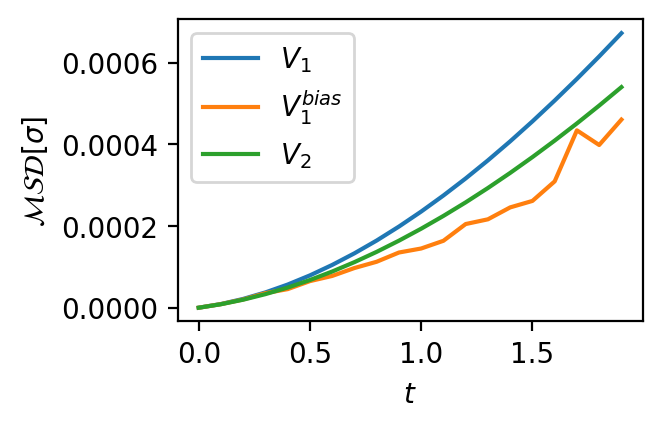

In [20]:
plt.plot(x, np.mean(msd_data_drift, axis=0), label=r"$V_1$")
plt.plot(x, bias, label=r"$V^{bias}_1$")
plt.plot(x, np.mean(val_msd_data_drift, axis=0), label=r"$V_2$")
#plt.plot(x, val_bias, label=r"$V^{bias}_2$")
plt.xlabel(r"$t$")
plt.ylabel(r"$\mathcal{MSD} [\sigma$]")
plt.legend()
#plt.xscale('log')

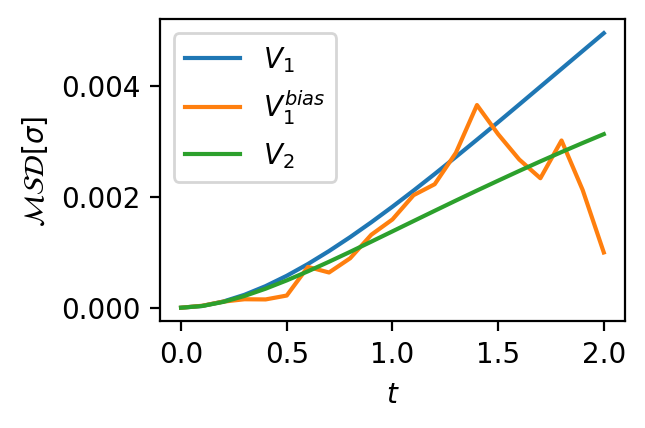

In [175]:
plt.plot(x, np.mean(msd_data_drift, axis=0), label=r"$V_1$")
plt.plot(x, new_bias, label=r"$V^{bias}_1$")
plt.plot(x, np.mean(val_msd_data_drift, axis=0), label=r"$V_2$")
#plt.plot(x, val_bias, label=r"$V^{bias}_2$")
plt.xlabel(r"$t$")
plt.ylabel(r"$\mathcal{MSD} [\sigma$]")
plt.legend()
#plt.xscale('log')